# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [3]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
# Carregar os dados do arquivo CSV
housing_data = pd.read_csv('housing.csv')

# Exibir as primeiras linhas do DataFrame para inspecionar a estrutura dos dados
housing_data.head()

from sklearn.preprocessing import LabelEncoder

# Preencher valores faltantes em 'total_bedrooms' com a média da coluna
mean_total_bedrooms = housing_data['total_bedrooms'].mean()
housing_data['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

# Converter a coluna categórica 'ocean_proximity' para um formato numérico usando Label Encoding
label_encoder = LabelEncoder()
housing_data['ocean_proximity'] = label_encoder.fit_transform(housing_data['ocean_proximity'])

# Verificar as mudanças
housing_data.head()



/tmp/ipykernel_3991/3814629565.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

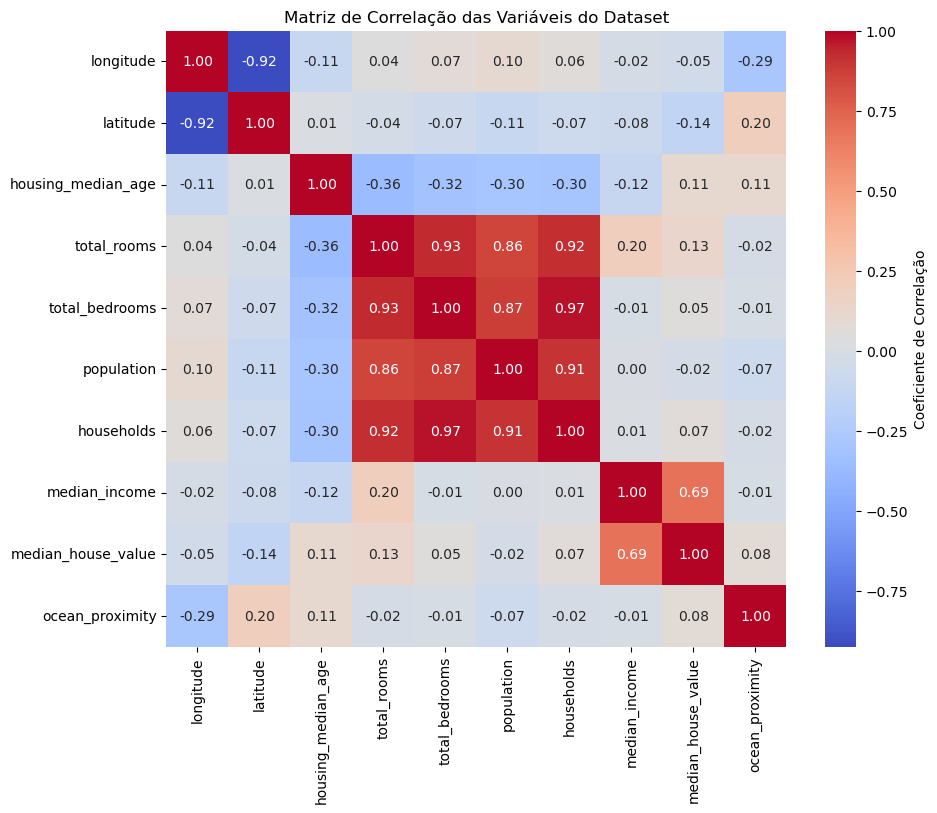

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = housing_data.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title("Matriz de Correlação das Variáveis do Dataset")
plt.show()


Algumas observações:

    median_income: Apresenta uma correlação relativamente alta (0.69) com median_house_value, indicando um bom potencial preditivo. Isto sugere que quanto maior a renda mediana, maior tende a ser o valor mediano das casas.
    total_rooms e total_bedrooms: Ambas têm correlações moderadas com median_house_value (0.13 e 0.05, respectivamente), mas podem ainda ser úteis em conjunto com outras variáveis para prever o valor da casa.
    latitude e longitude: Também mostram correlações interessantes com a median_house_value. A latitude, por exemplo, tem uma correlação negativa (-0.14), o que pode indicar uma variação regional nos preços das casas dentro da Califórnia.

### 3. Separe os dados em validação e teste

In [12]:
from sklearn.model_selection import train_test_split

# Definir as features e a variável alvo
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Dividir os dados em treinamento (60%) e temporário (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir os dados temporários em validação (50% de 40%, ou seja, 20% do total) e teste (o mesmo)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar o tamanho das divisões para garantir que está tudo correto
(X_train.shape, X_val.shape, X_test.shape)


((12384, 9), (4128, 9), (4128, 9))

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Criar e treinar o modelo com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Mensagens de confirmação
"Árvores treinadas. Uma com profundidade máxima de 8 e outra com profundidade máxima de 2."


'Árvores treinadas. Uma com profundidade máxima de 8 e outra com profundidade máxima de 2.'

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [19]:
from sklearn.metrics import mean_squared_error

# Calcular MSE para a árvore com profundidade máxima = 8
mse_train_depth_8 = mean_squared_error(y_train, tree_depth_8.predict(X_train))
mse_test_depth_8 = mean_squared_error(y_test, tree_depth_8.predict(X_test))

# Calcular MSE para a árvore com profundidade máxima = 2
mse_train_depth_2 = mean_squared_error(y_train, tree_depth_2.predict(X_train))
mse_test_depth_2 = mean_squared_error(y_test, tree_depth_2.predict(X_test))

(mse_train_depth_8, mse_test_depth_8, mse_train_depth_2, mse_test_depth_2)


(2895238067.121443, 3941200634.234994, 7274582461.4409895, 7671878629.269143)

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Os resultados do Mean Squared Error (MSE) para as duas árvores de decisão indicam que a árvore com profundidade máxima de 8 tem um desempenho superior à árvore com profundidade máxima de 2, tanto no conjunto de treinamento quanto no de testes.

Erro Menor: A árvore com profundidade 8 apresentou um erro significativamente menor em ambos os conjuntos. Isso sugere que ela é capaz de capturar a complexidade dos dados melhor do que a árvore mais rasa.

Risco de Sobreajuste: Apesar de ter um desempenho melhor, também é importante observar o potencial de sobreajuste. Comparando o MSE de treinamento com o de teste, a árvore de profundidade 8 tem um aumento, mas esse aumento não é extremamente elevado, o que sugere que, enquanto há algum sobreajuste, ele não é excessivo.

Simplicidade vs. Complexidade: A árvore com profundidade 2 é muito mais simples e, embora tenha um MSE mais alto, evita complicações e pode ser suficiente dependendo do contexto de aplicação. Por exemplo, se a interpretabilidade for mais crítica ou se os dados futuros forem esperados para variar menos, uma árvore mais simples poderia ser preferida.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

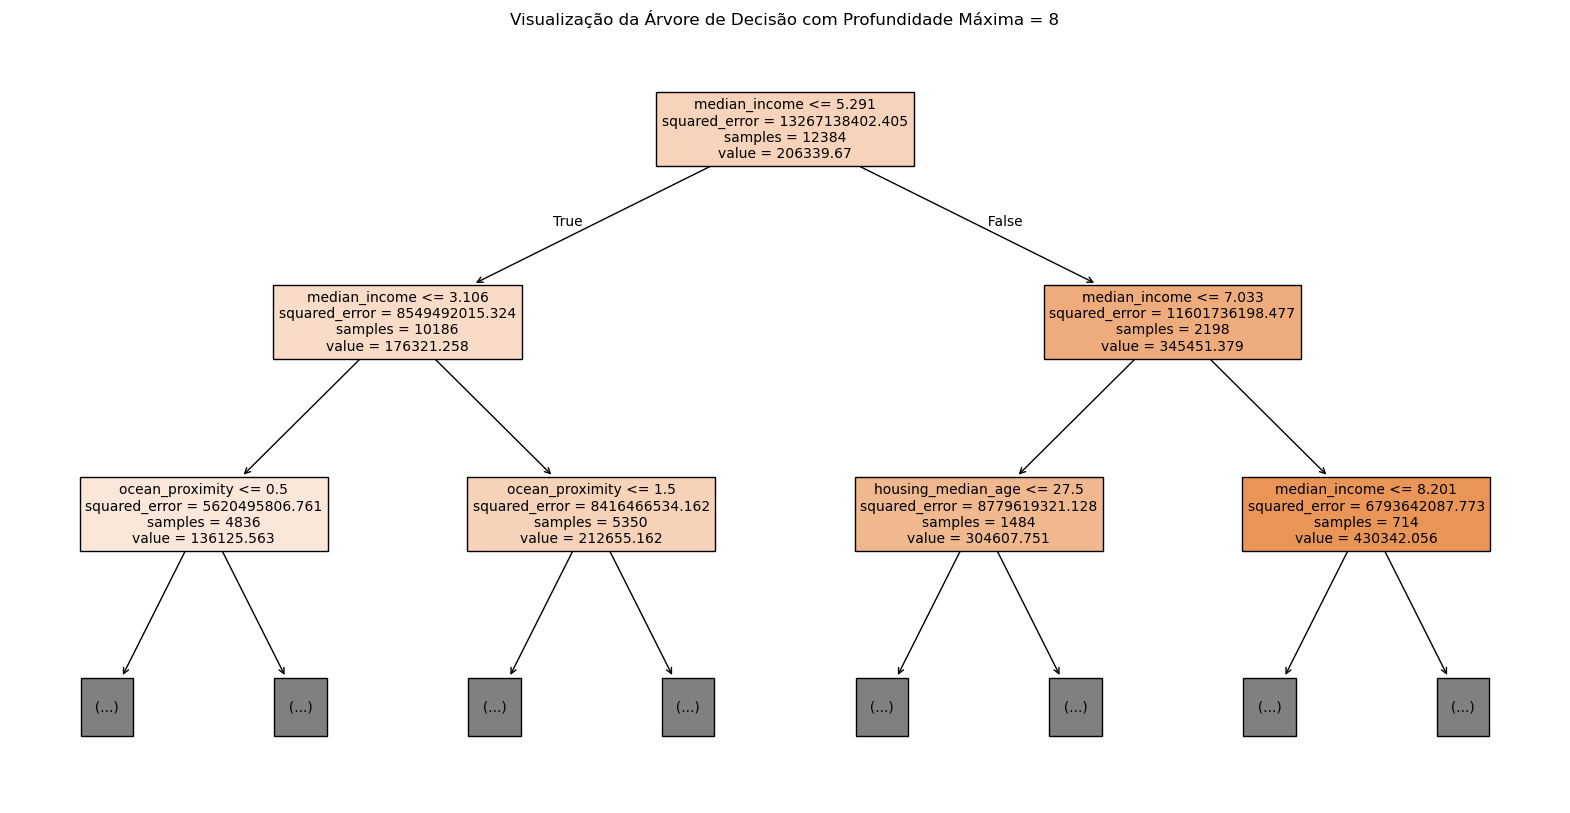

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_depth_8, feature_names=X.columns, max_depth=2, filled=True, fontsize=10)
plt.title("Visualização da Árvore de Decisão com Profundidade Máxima = 8")
plt.show()
